# Import Dependencies for Analysis and Data Preprocessing

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings

In [2]:
# Suppress UndefinedMetricWarning
warnings.filterwarnings("ignore")

# Function to Evaluate Model Performance with Classification Report and Confusion Matrix

In [3]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    return model


# Confusion Matrix Visualization

In [4]:
def plot_confusion_matrix(cm, class_labels=[1,2,3,4,5,6,7,8], figsize=(10, 8), cmap='Blues',title='Confusion Matrix'):

    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, 
                xticklabels=class_labels, 
                yticklabels=class_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

# Load and Preview Titanic Training Dataset

In [5]:
data = pd.read_csv('Zoo.csv')
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# Preprocessing

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
data['type'].value_counts()

type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64

In [8]:
l = []
for i in data['animal name']:
    l.append(i)
l

['aardvark',
 'antelope',
 'bass',
 'bear',
 'boar',
 'buffalo',
 'calf',
 'carp',
 'catfish',
 'cavy',
 'cheetah',
 'chicken',
 'chub',
 'clam',
 'crab',
 'crayfish',
 'crow',
 'deer',
 'dogfish',
 'dolphin',
 'dove',
 'duck',
 'elephant',
 'flamingo',
 'flea',
 'frog',
 'frog',
 'fruitbat',
 'giraffe',
 'girl',
 'gnat',
 'goat',
 'gorilla',
 'gull',
 'haddock',
 'hamster',
 'hare',
 'hawk',
 'herring',
 'honeybee',
 'housefly',
 'kiwi',
 'ladybird',
 'lark',
 'leopard',
 'lion',
 'lobster',
 'lynx',
 'mink',
 'mole',
 'mongoose',
 'moth',
 'newt',
 'octopus',
 'opossum',
 'oryx',
 'ostrich',
 'parakeet',
 'penguin',
 'pheasant',
 'pike',
 'piranha',
 'pitviper',
 'platypus',
 'polecat',
 'pony',
 'porpoise',
 'puma',
 'pussycat',
 'raccoon',
 'reindeer',
 'rhea',
 'scorpion',
 'seahorse',
 'seal',
 'sealion',
 'seasnake',
 'seawasp',
 'skimmer',
 'skua',
 'slowworm',
 'slug',
 'sole',
 'sparrow',
 'squirrel',
 'starfish',
 'stingray',
 'swan',
 'termite',
 'toad',
 'tortoise',
 'tuat

1. **Girl** - refers to a human child, not an animal.
2. **Vampire** - refers to either the mythical creature, not an animal.

 I remove "girl" and "Vampire" from the list. 

In [9]:
data.drop(index=[data[data['animal name'] == 'girl'].index[0],data[data['animal name'] == 'vampire'].index[0]],axis=0,inplace=True)

In [10]:
data.duplicated().sum()

0

In [11]:
data.drop(columns='animal name',inplace=True)

In [12]:
data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# Model Evaluation

In [13]:
X = data.drop(columns='type')
y = data['type']

In [14]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Create KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Evaluate the model using the defined function
model = evaluate_model(knn_model, X_train, X_test, y_train, y_test)

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         0
           4       0.67      1.00      0.80         2
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      0.33      0.50         3

    accuracy                           0.85        20
   macro avg       0.81      0.69      0.71        20
weighted avg       0.97      0.85      0.87        20

Confusion Matrix:
[[10  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  1  1  0  0  1]]



- **Accuracy:** 85%
- **Precision, Recall, and F1-Score:** 
  - **Class 1:** Perfect performance with 1.00 in all metrics.
  - **Class 2:** Perfect performance with 1.00 in all metrics.
  - **Class 3:** No predictions or true samples (precision, recall, f1-score = 0.00).
  - **Class 4:** High recall (1.00) with precision of 0.67 and an f1-score of 0.80.
  - **Class 5:** Precision of 1.00 but lower recall (0.50), f1-score of 0.67.
  - **Class 6:** Perfect performance with 1.00 in all metrics.
  - **Class 7:** High precision (1.00) but lower recall (0.33), f1-score of 0.50.

- **Macro Average:** 
  - Precision: 0.81
  - Recall: 0.69
  - F1-Score: 0.71

- **Weighted Average:** 
  - Precision: 0.97
  - Recall: 0.85
  - F1-Score: 0.87

**Confusion Matrix Overview:**
- **True Positives:** Predominantly correct predictions for classes 1, 2, and 6.
- **False Negatives:** Some misclassification for classes 5 and 7.
- **Class 3:** No samples predicted or true, indicating potential issues with class imbalance or model training for this class.

---

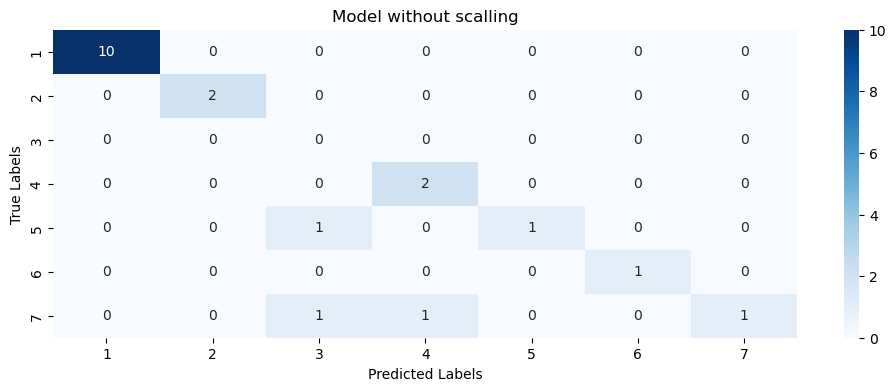

In [15]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, class_labels=[1,2,3,4,5,6,7], figsize=(12, 4), cmap='Blues',title='Model without scalling')

In [16]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Create KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Evaluate the model using the defined function
model = evaluate_model(knn_model, X_train_scaled, X_test_scaled, y_train, y_test)

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         2
           5       1.00      0.50      0.67         2
           6       0.50      1.00      0.67         1
           7       1.00      0.67      0.80         3

    accuracy                           0.90        20
   macro avg       0.79      0.74      0.73        20
weighted avg       0.97      0.90      0.92        20

Confusion Matrix:
[[10  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  1  2]]


t:**
- **Accuracy**: 90%
- **Class-wise Precision, Recall, and F1-Score**:
  - **Class 1**: Perfect performance with precision, recall, and F1-score of 1.00.
  - **Class 2**: Also achieves perfect scores (1.00) in all metrics.
  - **Class 3**: No predictions or true positives, leading to zero scores.
  - **Class 4**: Perfect performance with 1.00 in all metrics.
  - **Class 5**: Lower recall (0.50) with an F1-score of 0.67.
  - **Class 6**: Lower precision (0.50) but perfect recall (1.00), resulting in an F1-score of 0.67.
  - **Class 7**: Precision of 1.00 and recall of 0.67, with an F1-score of 0.80.

- **Macro Average**: Balanced performance with an F1-score of 0.73, reflecting variability across classes.
- **Weighted Average**: Shows high overall performance with an F1-score of 0.92, weighted by class support.

**Confusion Matrix:**
- **Diagonal Elements**: Show the correct predictions for each class, with a few misclassifications.
- **Class 3**: No instances were correctly predicted, indicating issues with this class.
- **Misclassifications**: Some overlap between classes, such as Class 5 being confused with Class 3, and Class 6 with Class 7.

Overall, the model performs well with high accuracy and strong perf.ror Class 3 and Class 5.

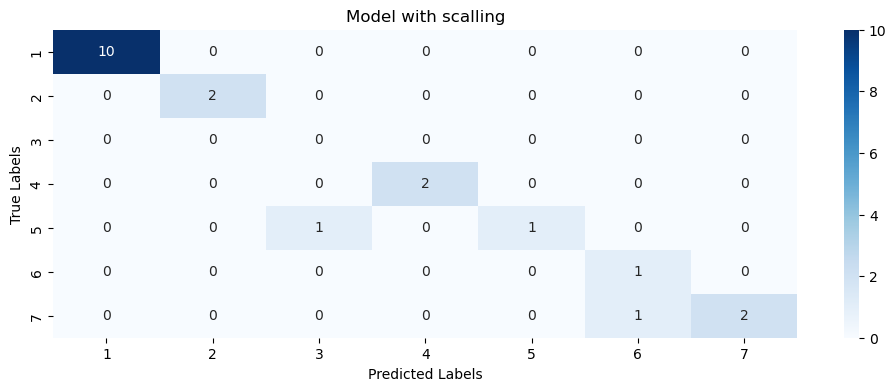

In [17]:
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, class_labels=[1,2,3,4,5,6,7], figsize=(12, 4), cmap='Blues',title='Model with scalling')

# Balancing Training Data with SMOTE

In [18]:
smote = SMOTE(k_neighbors=1)  
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [19]:
y = pd.Series(y_train)

# Get value counts
y.value_counts()


type
1    29
2    18
4    11
7     7
6     7
3     5
5     2
Name: count, dtype: int64

In [20]:
# Create KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=11)
# Evaluate the model using the defined function
model = evaluate_model(knn_model, X_train_smote, X_test, y_train_smote, y_test)

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00         2
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3

    accuracy                           0.95        20
   macro avg       0.94      0.98      0.96        20
weighted avg       0.97      0.95      0.95        20

Confusion Matrix:
[[9 0 1 0 0 0]
 [0 2 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 3]]



The classification model achieved an overall accuracy of 95%. It demonstrates high performance across most classes, with precision, recall, and F1-scores all being notably high. Specifically:
- **Class 1**: Precision of 1.00 and F1-score of 0.95.
- **Class 2**: Perfect scores with 1.00 precision and F1-score.
- **Class 4**: Lower precision at 0.67 but a perfect recall of 1.00.
- **Class 5**: Perfect scores across all metrics.
- **Class 6**: Achieved perfect precision and recall.
- **Class 7**: Also has perfect precision and recall.

**Confusion Matrix:**
The confusion matrix shows the following distribution:
- **Class 1**: 9 true positives and 1 false negative.
- **Class 2**: 2 true positives with no errors.
- **Class 4**: 2 true positives with no misclassifications.
- **Class 5**: 2 true positives with no errors.
- **Class 6**: 1 true positive with no misclassifications.
- **Class 7**: 3 true positives with no errors.

The model shows a strong ability to correctly classify instances with minimal misclassification.

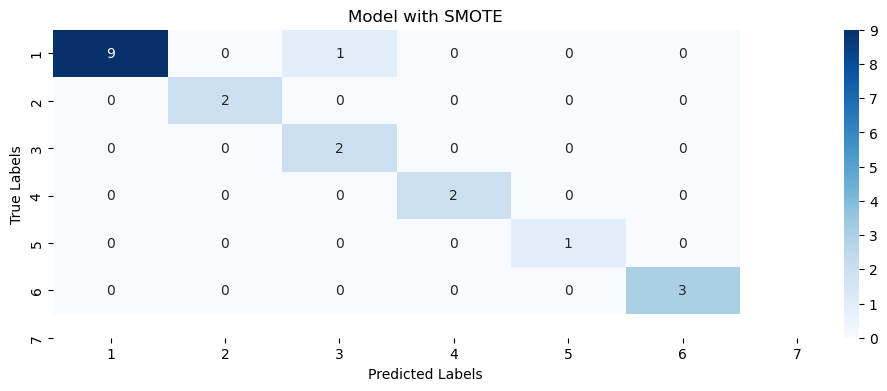

In [21]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, class_labels=[1,2,3,4,5,6,7], figsize=(12, 4), cmap='Blues',title='Model with SMOTE')

In [22]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}


In [23]:
knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters found by GridSearchCV:")
print(grid_search.best_params_)
print("Best Score achieved by GridSearchCV:")
print(grid_search.best_score_)


Best Parameters found by GridSearchCV:
{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best Score achieved by GridSearchCV:
0.9375


In [24]:
X = data.drop(columns='type')
y = data['type']

In [25]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Create KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5,p=1,weights='distance')

# Evaluate the model using the defined function
model = evaluate_model(knn_model, X_train_scaled, X_test_scaled, y_train, y_test)

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         3

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
[[10  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  3]]



- **Precision, Recall, and F1-Score:** All metrics are 1.00 across all classes, indicating perfect performance.
- **Accuracy:** 1.00 (100%), showing the model correctly predicted all instances.
- **Macro and Weighted Averages:** Both metrics are 1.00, reflecting the model’s consistent performance across all classes.

**Confusion Matrix:**
- The matrix shows perfect classification with no misclassifications, as each class is correctly predicted with no off-diagonal values.

**Summary:** The model achieves perfect performance with 100% accuracy and no misclassifications, suggesting overfitting. The model performs flawlessly on the training or test data but may not generalize well to unseen data.


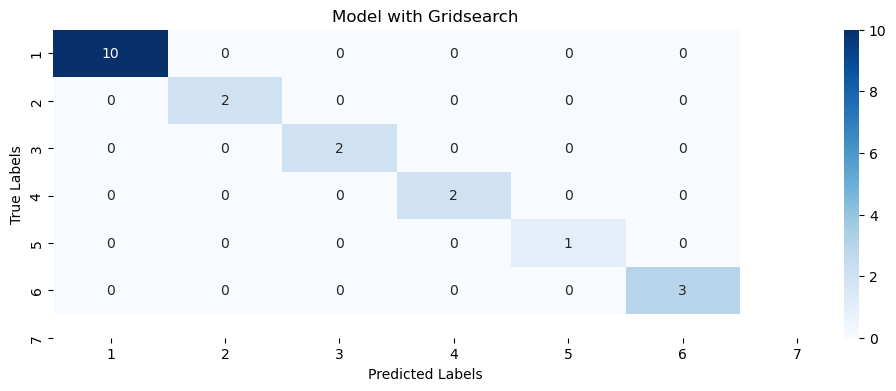

In [26]:
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, class_labels=[1,2,3,4,5,6,7], figsize=(12, 4), cmap='Blues',title="Model with Gridsearch")

# What are the key hyperparameters in KNN?abs

Key hyperparameters in the **K-Nearest Neighbors (KNN)** algorithm significantly impact the model’s performance and accuracy. Here are the most important ones:

### 1. **`n_neighbors` (K)**
   - **Description**: This is the number of nearest neighbors to consider when making predictions.
   - **Effect**: 
     - A smaller `K` (e.g., `K=1`) makes the model more sensitive to noise and leads to higher variance (overfitting).
     - A larger `K` leads to a smoother decision boundary but might increase bias (underfitting).
   - **Typical Values**: Commonly tested values range from 3 to 10, though optimal `K` depends on the data.

### 2. **`weights`**
   - **Description**: Determines how the distances of neighbors are weighted when predicting the class (or regression value) of a new point.
   - **Options**:
     - **`uniform`**: All neighbors are weighted equally.
     - **`distance`**: Closer neighbors have a higher influence than distant neighbors.
   - **Effect**:
     - **`uniform`** works better when the distribution of neighbors is relatively uniform.
     - **`distance`** is useful when closer neighbors are more reliable indicators of the target.

### 3. **`metric`**
   - **Description**: The distance metric used to calculate the distance between points.
   - **Common Metrics**:
     - **`euclidean`**: Standard straight-line distance between two points.
     - **`manhattan`**: Distance measured along axes at right angles (L1 norm).
     - **`minkowski`**: A generalization that includes both Euclidean and Manhattan by setting the `p` parameter.
     - **`cosine`**: Cosine similarity-based distance.
   - **Effect**: The choice of distance metric can influence how the algorithm defines "closeness" and the effectiveness of the model for different datasets.

### 4. **`p` (for Minkowski Distance)**
   - **Description**: This parameter is used with the Minkowski distance metric.
   - **Effect**:
     - **`p=1`**: Equivalent to the Manhattan distance (L1 norm).
     - **`p=2`**: Equivalent to the Euclidean distance (L2 norm).
     - Higher values emphasize larger differences, changing how distances are calculated between points.

### 5. **`algorithm`**
   - **Description**: The algorithm used to compute the nearest neighbors.
   - **Options**:
     - **`auto`**: Automatically selects the best algorithm.
     - **`ball_tree`**: A tree-based approach.
     - **`kd_tree`**: Another tree-based approach.
     - **`brute`**: A brute-force search that computes the distance between all points.
   - **Effect**: Influences the speed and efficiency of the algorithm, especially with large datasets. `kd_tree` and `ball_tree` are faster for higher dimensions, while `brute` may be useful for small datasets.

### 6. **`leaf_size`**
   - **Description**: This is the leaf size passed to the `ball_tree` or `kd_tree` algorithms.
   - **Effect**: Smaller values speed up the tree-building process but may slow down the query time, while larger values slow down tree-building but speed up querying. Tuning this can improve model efficiency with large datasets.

### 7. **`n_jobs`**
   - **Description**: Specifies the number of parallel jobs to run for distance computations.
   - **Effect**: A higher value (e.g., `n_jobs=-1` for using all cores) speeds up training and prediction, especially with large datasets.

### Summary of Key Hyperparameters:
- **`n_neighbors`**: Number of neighbors (K).
- **`weights`**: Uniform or distance-based weighting of neighbors.
- **`metric`**: Distance metric (Euclidean, Manhattan, Minkowski, etc.).
- **`p`**: Minkowski parameter.
- **`algorithm`**: Algorithm for neighbor search (auto, brute, ball_tree, kd_tree).
- **`leaf_size`**: Affects tree-based search algorithms.
- **`n_jobs`**: Parallel processing to speed up computations.

Choosing the right combination of these hyperparameters can significantly impact the model’s performance.

# What distance metrics can be used in KNN?abs

In **K-Nearest Neighbors (KNN)**, distance metrics are used to measure the "closeness" between data points. The choice of distance metric significantly affects how the model identifies nearest neighbors. Here are the most commonly used distance metrics in KNN:

### 1. **Euclidean Distance (L2 Norm)**
   - **Formula**:  

     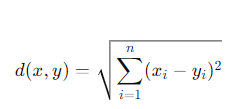

   - **Description**: This is the standard straight-line distance between two points in Euclidean space.
   - **Use Case**: It works well in many general scenarios and is the default metric in most KNN implementations.

### 2. **Manhattan Distance (L1 Norm)**
   - **Formula**:
   - 
     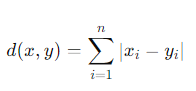
     
   - **Description**: This is the sum of the absolute differences of the coordinates (also called the "taxicab" distance).
   - **Use Case**: Works well when the differences between features are better captured by absolute differences (e.g., grid-like structures).

### 3. **Minkowski Distance**
   - **Formula**:
     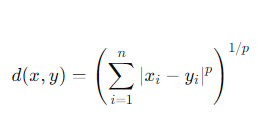

   - **Description**: This is a generalization of both Euclidean and Manhattan distances. By adjusting the parameter `p`, you can switch between the two:
     - **p = 1**: Equivalent to Manhattan distance.
     - **p = 2**: Equivalent to Euclidean distance.
   - **Use Case**: Provides flexibility between L1 (Manhattan) and L2 (Euclidean) norms depending on the dataset.

### 4. **Chebyshev Distance (L∞ Norm)**
   - **Formula**:
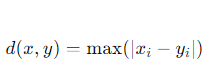
     
   - **Description**: It measures the maximum difference between coordinates in any dimension.
   - **Use Case**: Useful in situations where the maximum distance between coordinates is critical, rather than the cumulative distance.

### 5. **Cosine Distance**
   - **Formula**:  
     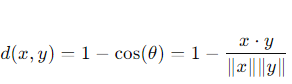
   - **Description**: Cosine distance measures the cosine of the angle between two vectors rather than their magnitude. It focuses on the direction rather than the distance between the points.
   - **Use Case**: Often used in text and document similarity (high-dimensional sparse data) where the magnitude of vectors is less important than their orientation.

### 6. **Hamming Distance**
   - **Formula**:  
     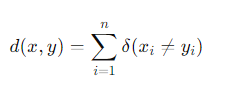
   - **Description**: Hamming distance counts the number of positions at which the corresponding elements differ between two binary strings or categorical variables.
   - **Use Case**: Useful when the features are categorical, like in text or DNA sequences.

### 7. **Mahalanobis Distance**
   - **Formula**:  
     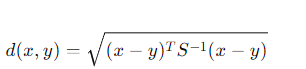
   - **Description**: It measures the distance between two points while accounting for correlations between the variables (using the inverse covariance matrix `S`).
   - **Use Case**: Useful for data with correlated features or when scaling is important.

### 8. **Jaccard Distance**
   - **Formula**:  
     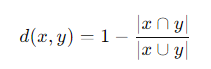
   - **Description**: This metric measures the dissimilarity between two sets by considering the ratio of the intersection to the union of the sets.
   - **Use Case**: Useful for binary or set-like data, such as text documents or genetic sequences.

---

### Summary of Distance Metrics in KNN:
- **Euclidean Distance**: Common default, measures straight-line distance.
- **Manhattan Distance**: Focuses on grid-like structures using absolute differences.
- **Minkowski Distance**: A generalized form that includes both Euclidean and Manhattan.
- **Chebyshev Distance**: Maximum distance along any axis.
- **Cosine Distance**: Measures angular difference, used in text similarity.
- **Hamming Distance**: Compares categorical or binary features.
- **Mahalanobis Distance**: Accounts for correlations in the data.
- **Jaccard Distance**: Used for set-based or binary data comparisons.

The choice of distance metric depends on the nature of the data and the problem you're solving.